[15:39:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

[15:39:18] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


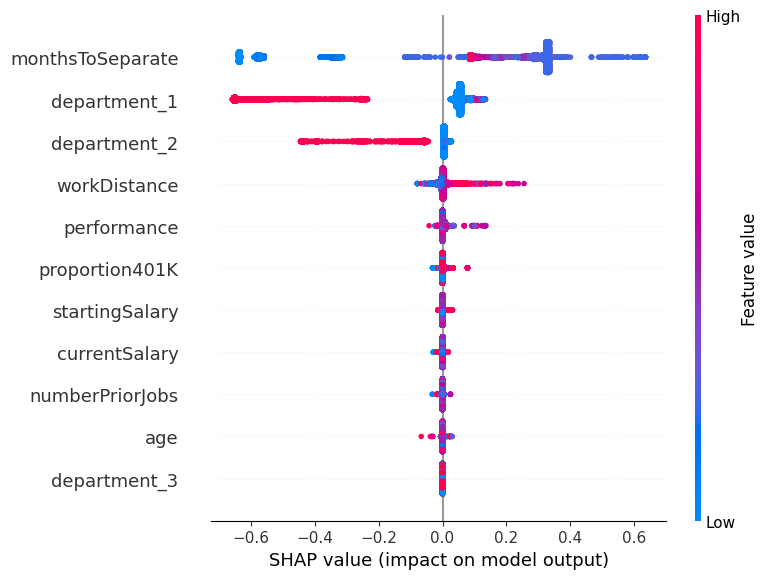

In [6]:
from joblib import load, dump
import numpy as np
import shap
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, matthews_corrcoef
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb



X_train_scaled, X_test_scaled, y_train, y_test = load(
  '/workspaces/learning_level-up-python-data-modeling-and-model-evaluation-metrics-2499737/data/model_data.joblib'
  )

xgb_model = xgb.XGBClassifier()

param_distributions = {
  'eta': np.linspace(0, 1, 11), 
  'gamma': range(0, 10, 2), 
  'min_child_weight': range(0, 10),
  'max_depth': range(3, 10), 
  'n_estimators': [50, 100, 200]
  }

xgb_search = RandomizedSearchCV(
  xgb_model, 
  param_distributions=param_distributions, 
  n_iter=5, 
  scoring='roc_auc', 
  random_state=1001
)

xgb_search.fit(X_train_scaled, y_train)

xgb_search.best_score_
xgb_search.best_params_
                             
xgb_search.score(X_test_scaled, y_test)

predictions = xgb_search.predict(X_test_scaled)

dump(
  xgb_search, 
  '/workspaces/learning_level-up-python-data-modeling-and-model-evaluation-metrics-2499737/data/xgboost_model.joblib'
  )

balanced_accuracy_score(y_test, predictions)
matthews_corrcoef(y_test, predictions)
auc = roc_auc_score(y_test, xgb_search.predict_proba(X_test_scaled)[:, 1])

Xd = xgb.DMatrix(X_train_scaled, label=y_train)

model = xgb.train(
  {'max_depth':6, 
  'n_estimators':200}, 
  Xd)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xd)

column_names = [
  'age', 'numberPriorJobs', 'proportion401K', 
  'startingSalary', 'currentSalary', 'performance', 
  'monthsToSeparate', 'workDistance', 'department_1', 
  'department_2', 'department_3'
  ]

shap.summary_plot(
  shap_values, 
  X_train_scaled,
  feature_names = column_names
  )




In [2]:
import os

# Get current working directory
cwd = os.getcwd()

print(cwd)

/workspaces/learning_level-up-python-data-modeling-and-model-evaluation-metrics-2499737/code
